# Comparison plots

This notebook contains codes for plotting comparison plots

# With k-fold

Install necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

code to calculate F1 score

In [ ]:
precision = 0.990
recall = 0.977

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.983457041179461

define data

In [ ]:
data = {
    'Model': ['YOLOv3', 'YOLOv8', 'YOLOv9', 'Retina Net', 'Cascade R_CNN', 'Dynamic R_CNN'],
    'Size (MB)': [198.1, 5.9, 49.2, 0, 0, 0],
    'Memmory Usage (GB)': [0.58, 0.19, 0.32, 1.87, 1.93, 1.87],
    'Inference time (ms/im)': [14.13, 10.03, 19.90, 217.4, 434.8, 208.3],
    'FPS': [70.78, 99.70, 50.25, 4.6, 2.3, 4.8],
    'Precision': [0.9401661323697852,  0.9512984679256584, 0.9540703873912217, 0.990, 0.990, 0.990],
    'Recall': [0.8654289449190956, 0.8473895582329317, 0.8537005163511188, 0.967, 0.980, 0.977],
    'mAP50': [0.9264941173412692, 0.9173107589947531, 0.9227896003101418, 0.990, 0.990, 0.990],
    'mAP75': [0.8756691825218096, 0.8631162501928894, 0.8789741427773413, 0.977, 0.990, 0.990],
    'b_map50_95' : [0.8077889806273552,0.8481622575547834, 0.8245971987196166,  0.832, 0.863, 0.866],
    'mAP50-95': [0.822415099324223, 0.7849220178815477, 0.8209799212131751, 0.948, 0.970, 0.969],
    'F1 Score': [0.9012507778955059, 0.8963426417029062, 0.9010991167797733, 0.9783648441492081, 0.98497461928934, 0.983457041179461]
}
df = pd.DataFrame(data)

In [ ]:
df

,Model,Size (MB),Memmory Usage (GB),Inference time (ms/im),FPS,Precision,Recall,mAP50,mAP75,b_map50_95,mAP50-95,F1 Score
0,YOLOv3,198.1,0.58,14.13,70.78,0.940166,0.865429,0.926494,0.875669,0.807789,0.822415,0.901251
1,YOLOv8,5.9,0.19,10.03,99.70,0.951298,0.847390,0.917311,0.863116,0.848162,0.784922,0.896343
2,YOLOv9,49.2,0.32,19.90,50.25,0.954070,0.853701,0.922790,0.878974,0.824597,0.820980,0.901099
3,Retina Net,0.0,1.87,217.40,4.60,0.990000,0.967000,0.990000,0.977000,0.832000,0.948000,0.978365
4,Cascade R_CNN,0.0,1.93,434.80,2.30,0.990000,0.980000,0.990000,0.990000,0.863000,0.970000,0.984975
5,Dynamic R_CNN,0.0,1.87,208.30,4.80,0.990000,0.977000,0.990000,0.990000,0.866000,0.969000,0.983457


Inference Time vs mAP for Different Models and Confidence Levels

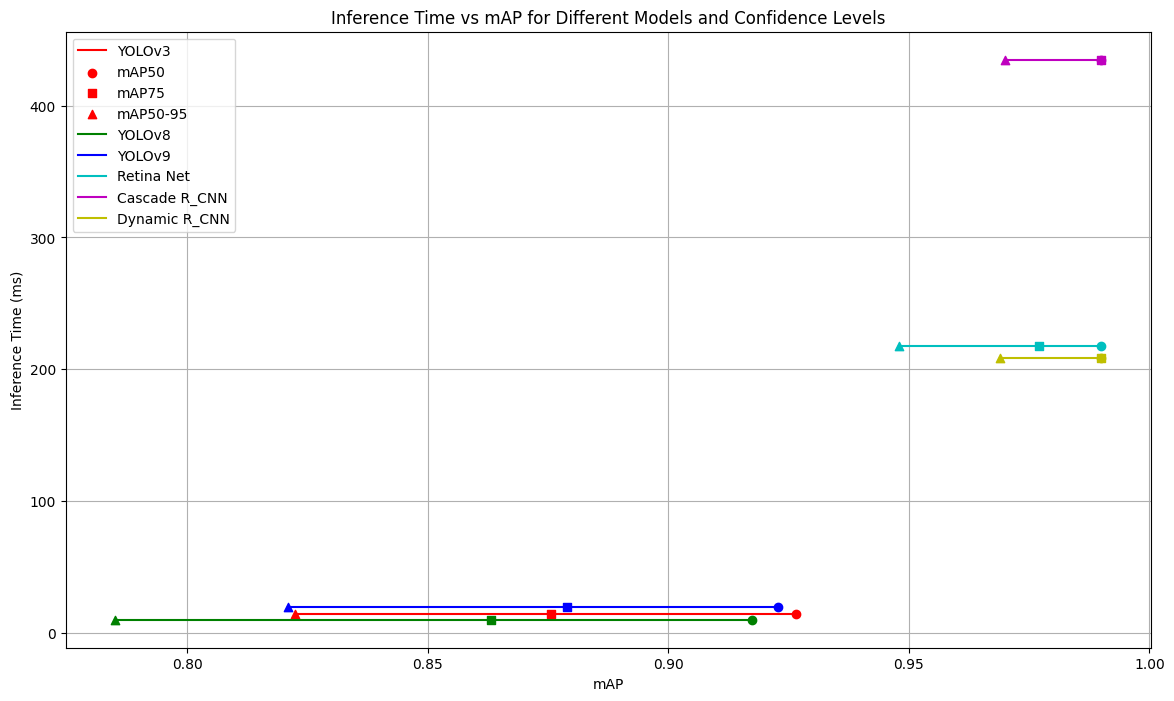

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(14, 8))

# Define markers for different thresholds
markers = {'mAP50': 'o', 'mAP75': 's', 'mAP50-95': '^'}
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Different colors for each model

# Plot each model's mAP values at different confidence levels
for i, model in enumerate(df['Model']):
    inference_times = df.loc[i, 'Inference time (ms/im)']
    mAP_values = [df.loc[i, level] for level in markers.keys()]

    plt.plot(mAP_values, [inference_times] * len(markers), color=colors[i], linestyle='-', label=model)
    for j, level in enumerate(markers.keys()):
        plt.scatter(mAP_values[j], inference_times, marker=markers[level], color=colors[i], label=f'{level}' if i == 0 else "")

# Create custom legend for thresholds
handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10, label=label) for label, marker in markers.items()]
plt.legend(handles=handles, title='Confidence Levels')

# Annotate points with model names
for i, model in enumerate(df['Model']):
    inference_times = df.loc[i, 'Inference time (ms/im)']

plt.ylabel('Inference Time (ms)')
plt.xlabel('mAP')
plt.legend()
plt.title('Inference Time vs mAP for Different Models and Confidence Levels')
plt.grid(True)
plt.show()


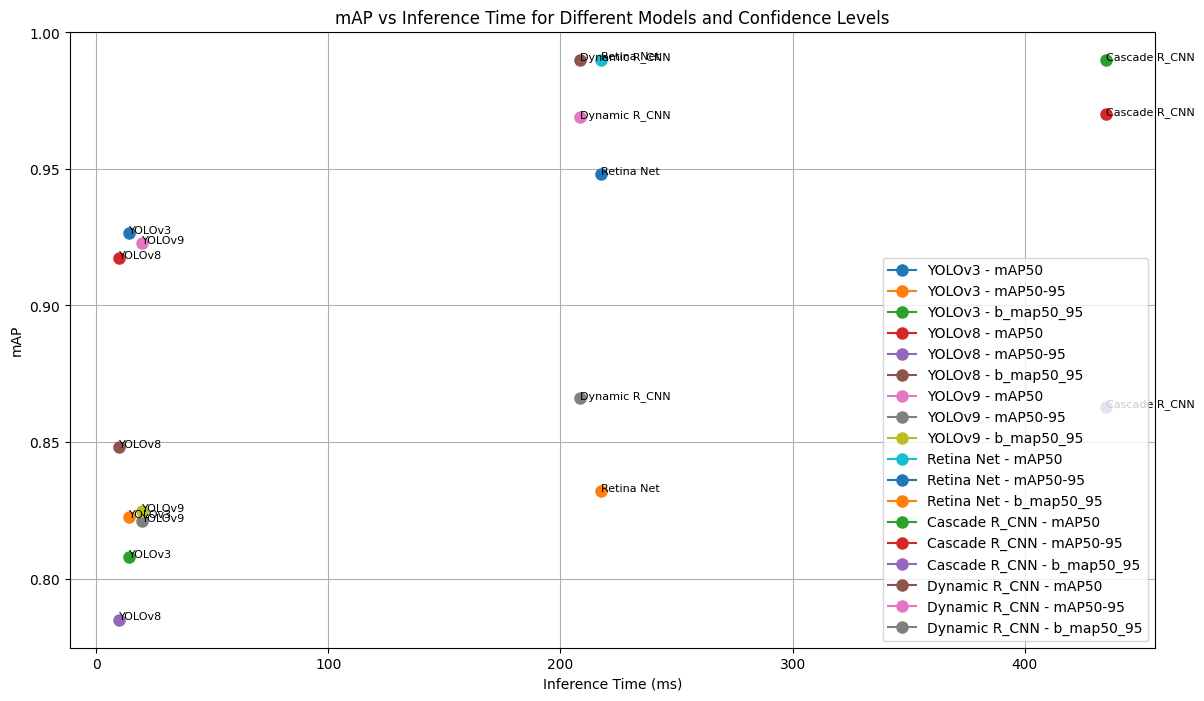

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot each model with different mAP values
models = df['Model']
confidence_levels = ['mAP50', 'mAP50-95', 'b_map50_95']

for i, model in enumerate(models):
    inference_times = df[df['Model'] == model]['Inference time (ms/im)']
    for level in confidence_levels:
        map_values = df[df['Model'] == model][level]
        plt.plot(inference_times, map_values, marker='o', linestyle='-', label=f'{model} - {level}', markersize=8)

# Annotate points with model names and confidence levels
for i, row in df.iterrows():
    for level in confidence_levels:
        plt.text(row['Inference time (ms/im)'], row[level], row['Model'], fontsize=8)

plt.xlabel('Inference Time (ms)')
plt.ylabel('mAP')
plt.title('mAP vs Inference Time for Different Models and Confidence Levels')
plt.legend()
plt.grid(True)
plt.show()

Memory Usage Comparison

<ipython-input-14-86f8279e650c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Model', x='Memmory Usage (GB)', palette='viridis')


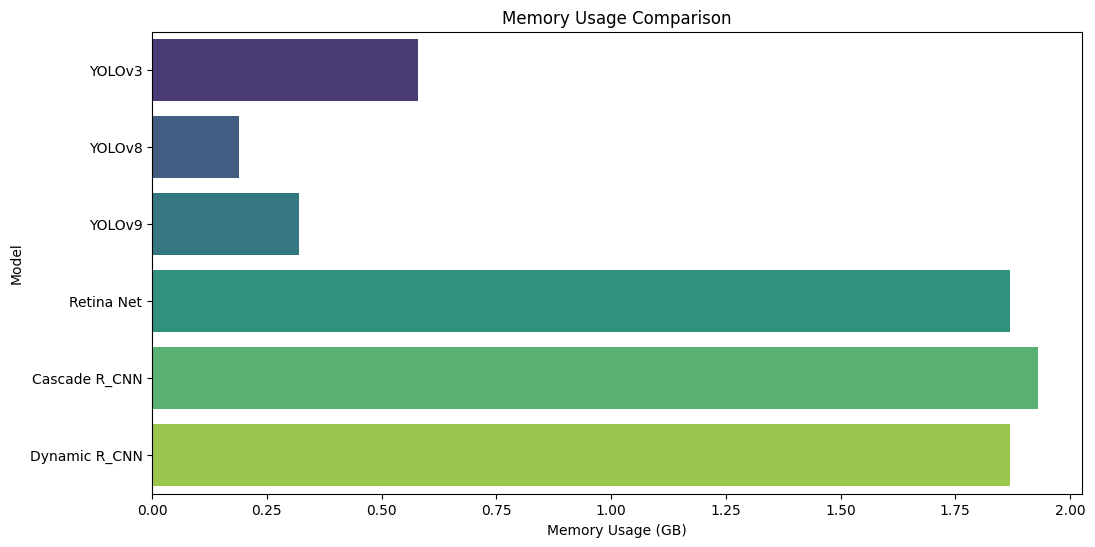

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Model', x='Memmory Usage (GB)', palette='viridis')
plt.title('Memory Usage Comparison')
plt.xlabel('Memory Usage (GB)')
plt.ylabel('Model')
plt.show()


In [ ]:
baseline = {'Precision': 0.80, 'Recall': 0.75, 'F1 Score': 0.77, 'mAP50': 0.78, 'mAP50-95': 0.70}
model2 = {'Precision': 0.85, 'Recall': 0.80, 'F1 Score': 0.82, 'mAP50': 0.84, 'mAP50-95': 0.75}

improvement = {key: (model2[key] - baseline[key]) / baseline[key] * 100 for key in baseline}

plt.bar(improvement.keys(), improvement.values())
plt.xlabel('Metrics')
plt.ylabel('Improvement (%)')
plt.title('Relative Improvement Over Baseline')
plt.show()


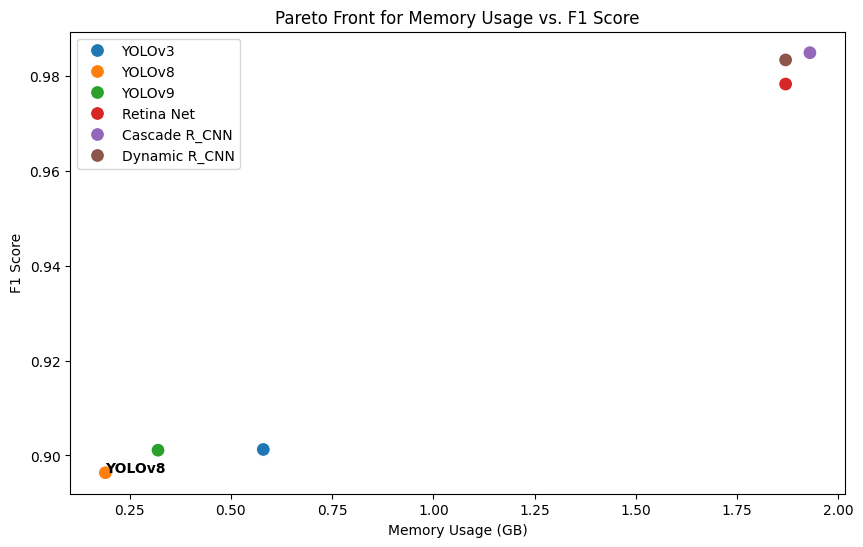

In [ ]:
import numpy as np

def is_pareto_efficient(costs):
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0
    while next_point_index < len(costs):
        nondominated_point_mask = np.any(costs <= costs[next_point_index], axis=1)
        is_efficient = is_efficient[nondominated_point_mask]
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index+1])
    return is_efficient

costs = df[['Memmory Usage (GB)', 'Inference time (ms/im)', 'F1 Score']].values
pareto_indices = is_pareto_efficient(costs)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Memmory Usage (GB)', y='F1 Score', hue='Model', s=100)
for i in pareto_indices:
    plt.text(df['Memmory Usage (GB)'][i], df['F1 Score'][i], df['Model'][i], weight='bold')
plt.title('Pareto Front for Memory Usage vs. F1 Score')
plt.xlabel('Memory Usage (GB)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


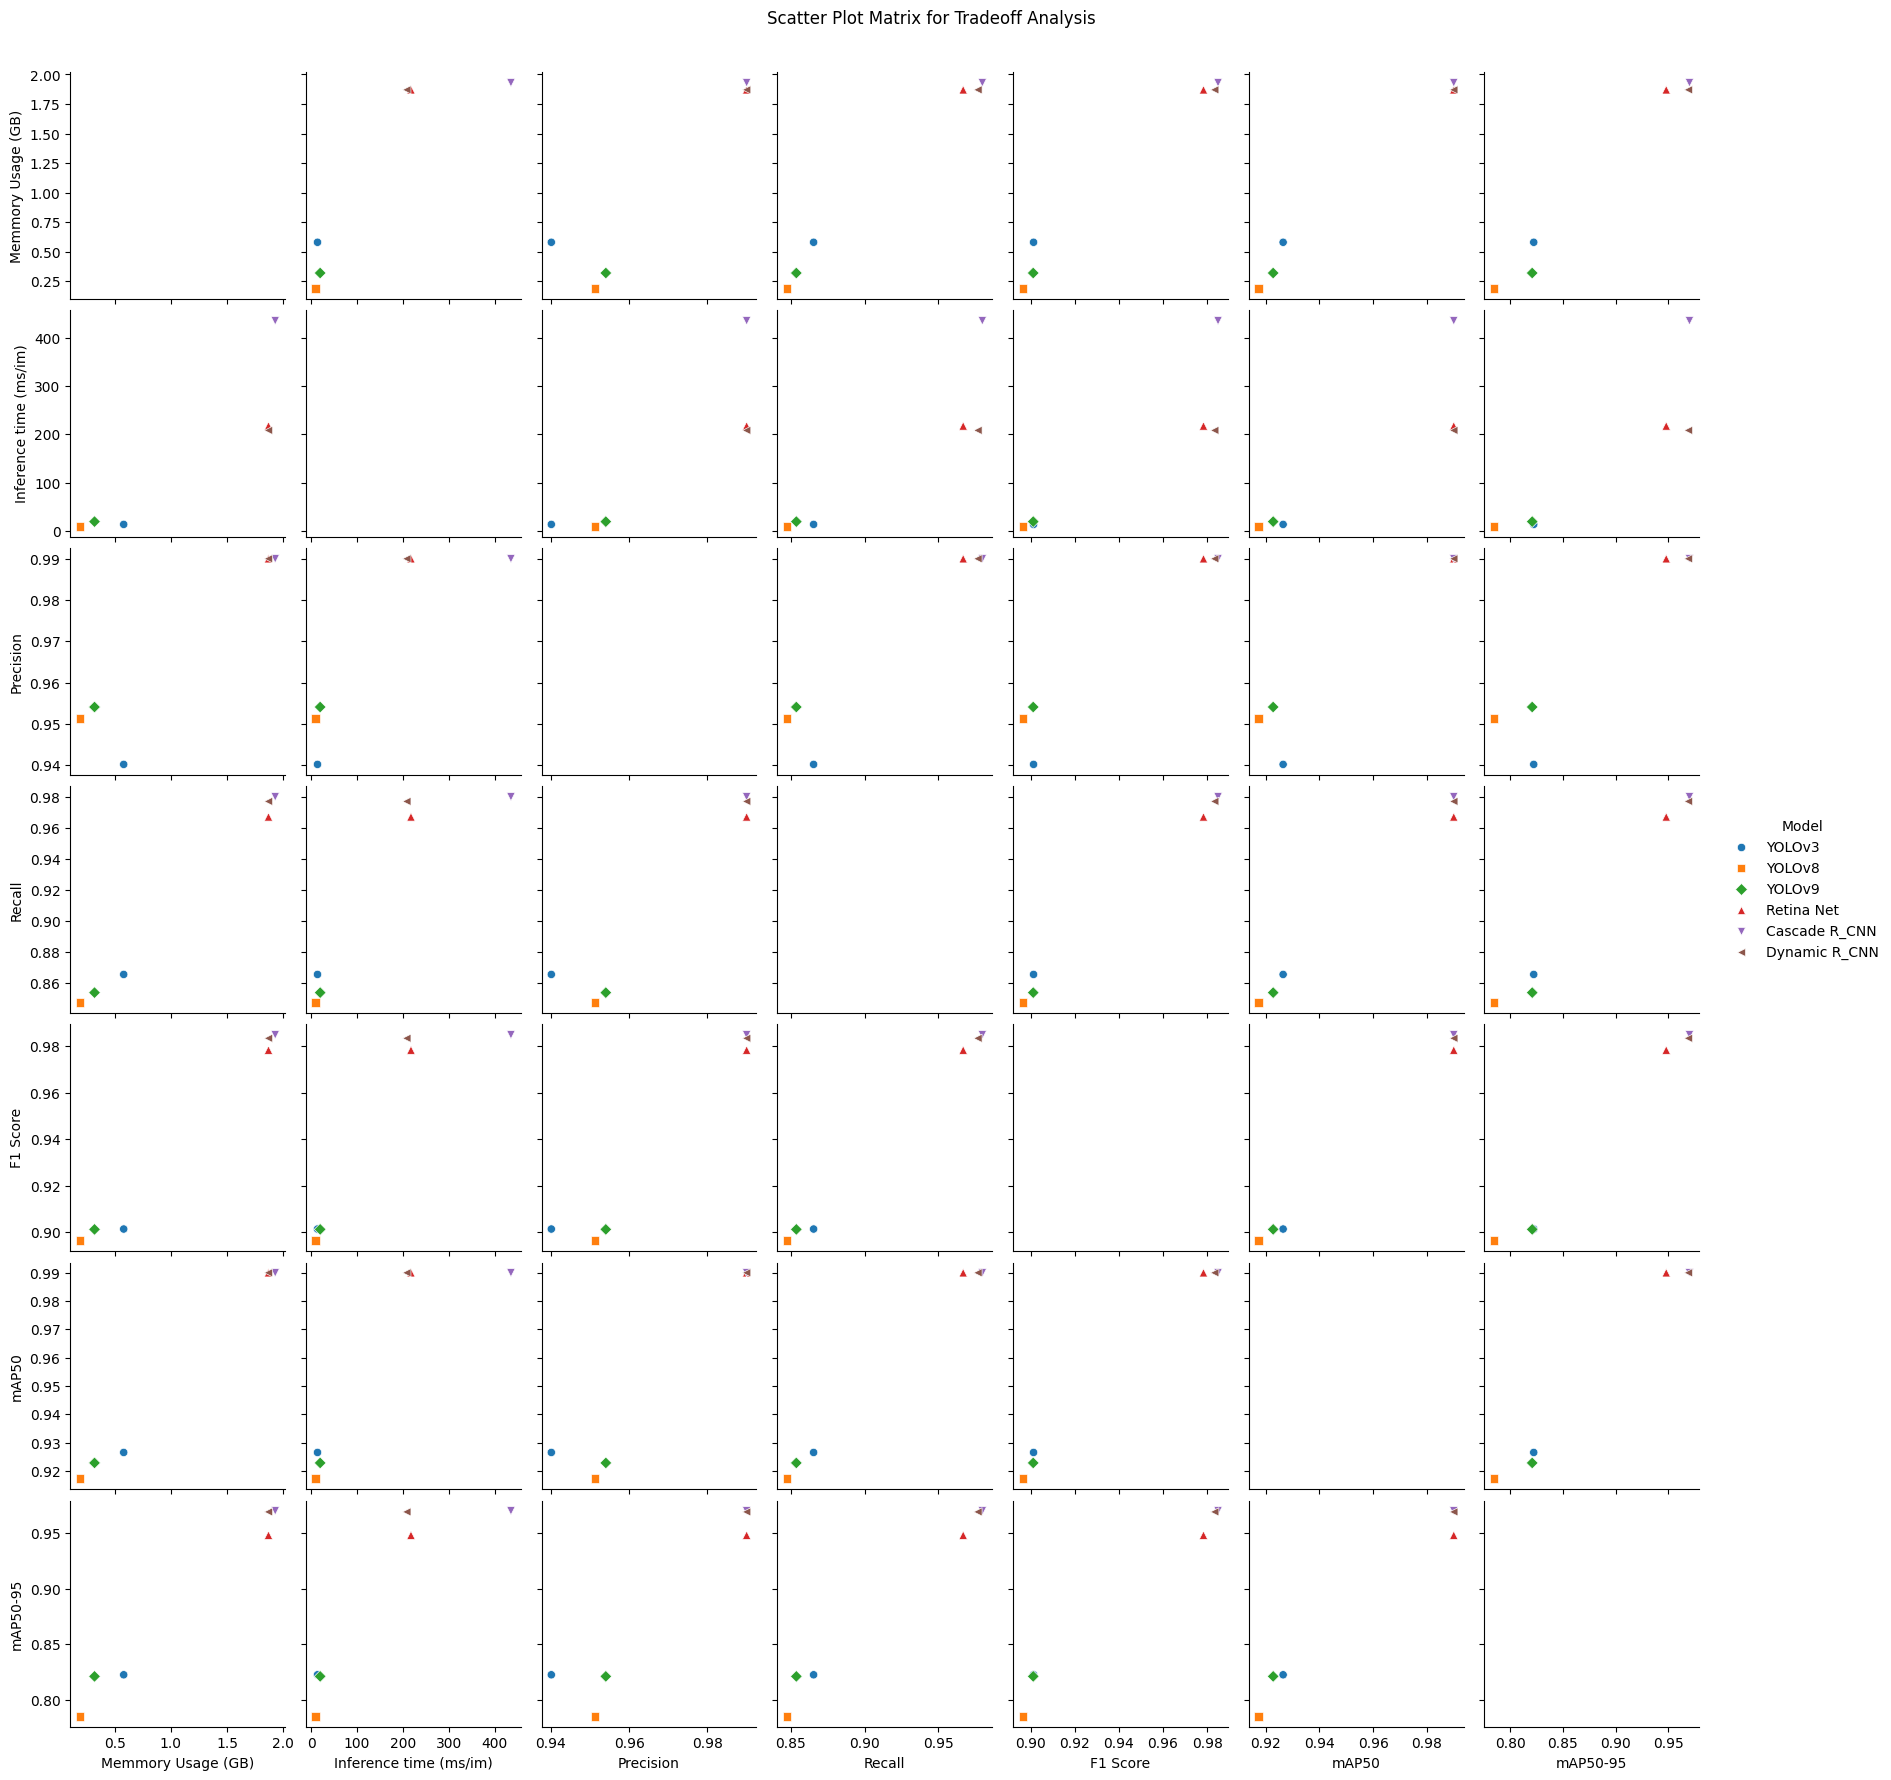

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for tradeoff analysis
metrics = ['Memmory Usage (GB)', 'Inference time (ms/im)', 'Precision', 'Recall', 'F1 Score', 'mAP50', 'mAP50-95']
sns.pairplot(df, vars=metrics, hue='Model', markers=["o", "s", "D", "^", "v", "<"])
plt.suptitle('Scatter Plot Matrix for Tradeoff Analysis', y=1.02)
plt.show()


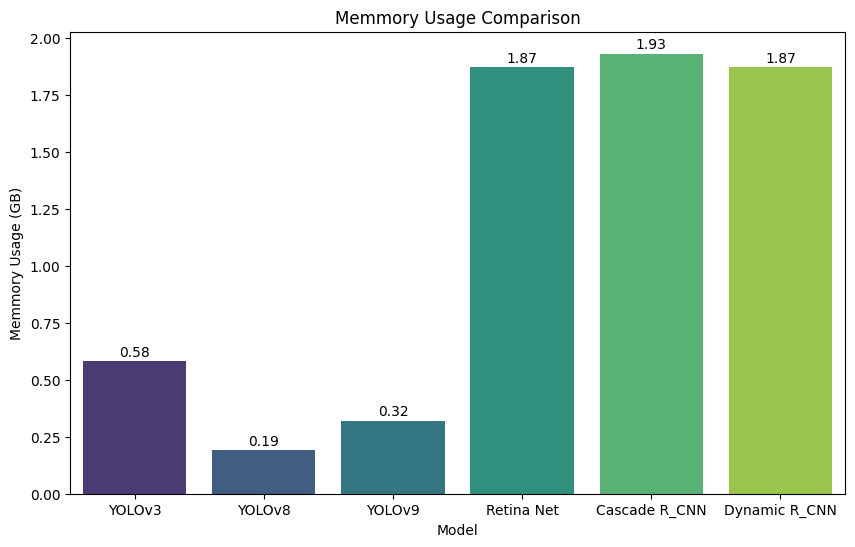

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model',hue='Model', y='Memmory Usage (GB)', data=df, palette='viridis')

# Annotate each bar with the value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.title('Memmory Usage Comparison')
plt.show()

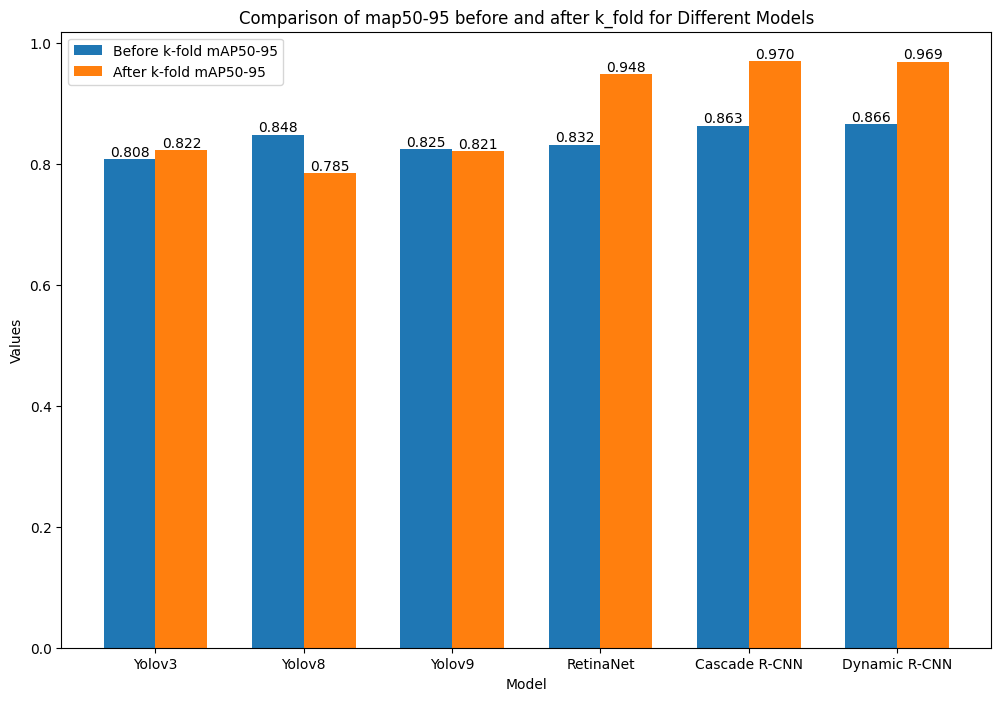

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Yolov3',  'Yolov8','Yolov9', 'RetinaNet', 'Cascade R-CNN', 'Dynamic R-CNN']
b_map50_95 = [0.8077889806273552,0.8481622575547834, 0.8245971987196166,  0.832, 0.863, 0.866]
a_mAP50_95 = [0.822415099324223, 0.7849220178815477, 0.8209799212131751, 0.948, 0.970, 0.969]

# Setting up the plot
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Bar plots
bars1 = ax.bar(x - width/2, b_map50_95, width, label='Before k-fold mAP50-95')
bars2 = ax.bar(x + width/2, a_mAP50_95, width, label='After k-fold mAP50-95')

# Adding text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Values')
ax.set_title('Comparison of map50-95 before and after k_fold for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

# Adding labels on top of bars
add_labels(bars1)
add_labels(bars2)

# Showing the plot
plt.show()


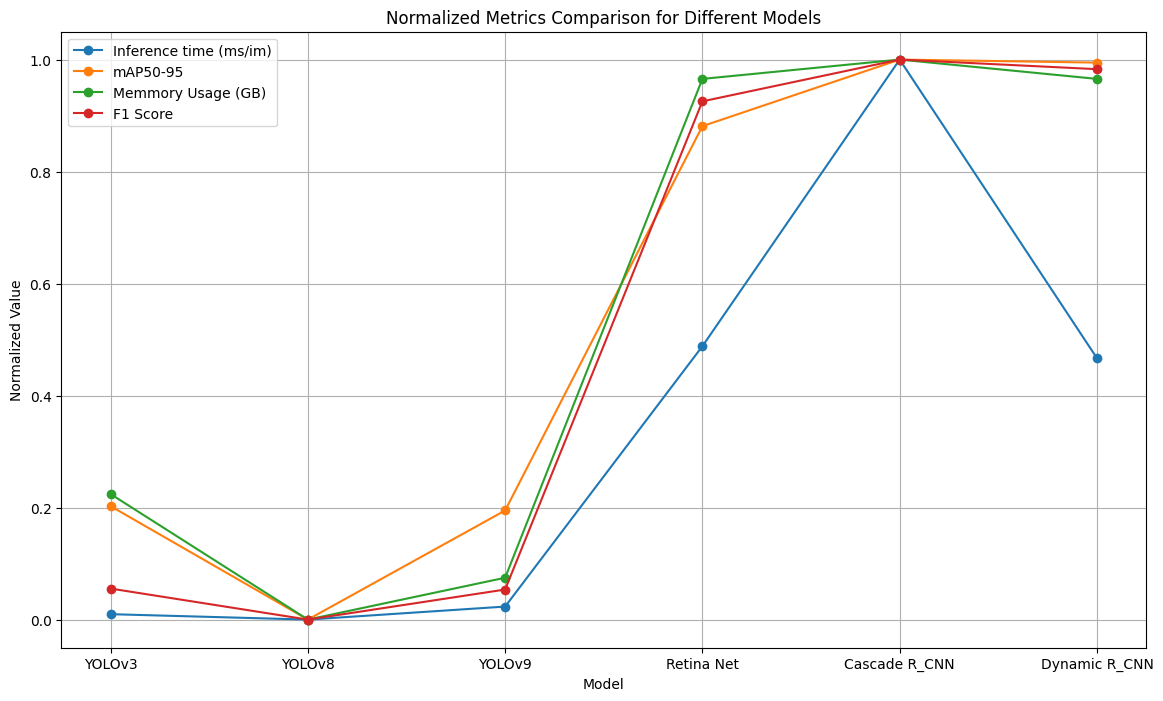

In [ ]:
# Normalize the data
metrics = ['Inference time (ms/im)', 'mAP50-95','Memmory Usage (GB)','F1 Score']
df_normalized = df.copy()
df_normalized[metrics] = df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot the data
plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(df['Model'], df_normalized[metric], marker='o', label=metric)

plt.title('Normalized Metrics Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

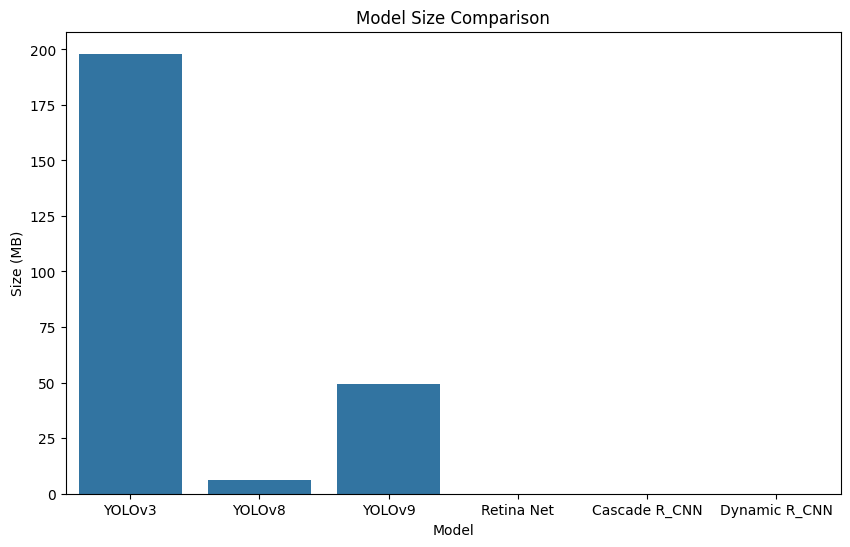

In [ ]:
#model sizes

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Size (MB)', data=df)
plt.title('Model Size Comparison')
plt.show()


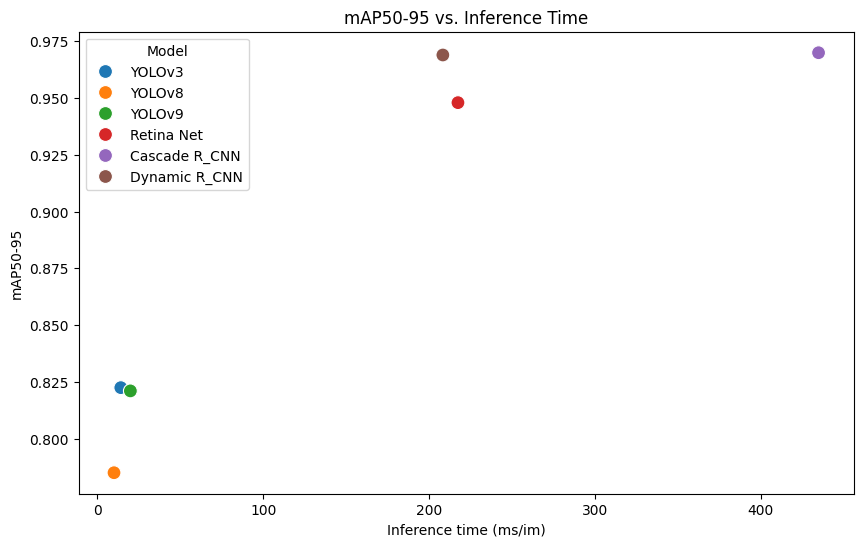

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inference time (ms/im)', y='mAP50-95', hue='Model', data=df, s=100)
plt.title('mAP50-95 vs. Inference Time')
plt.show()


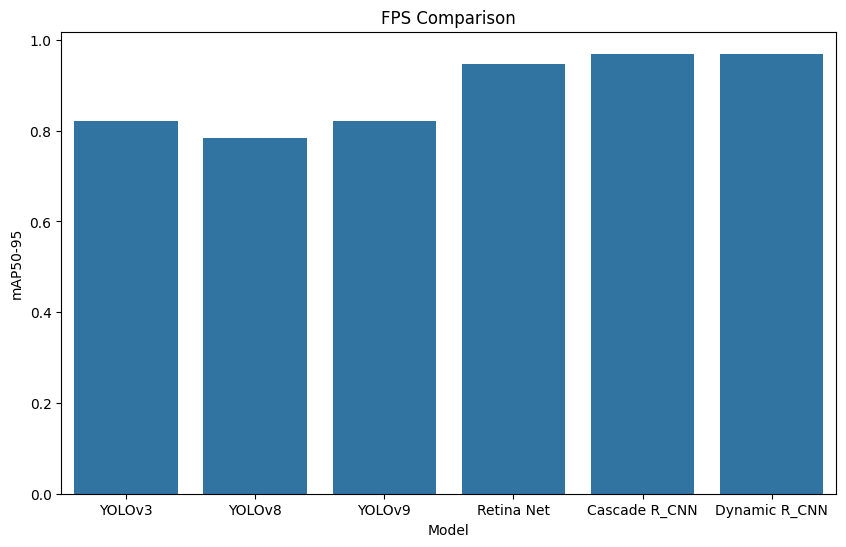

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='mAP50-95', data=df)
plt.title('FPS Comparison')
plt.show()

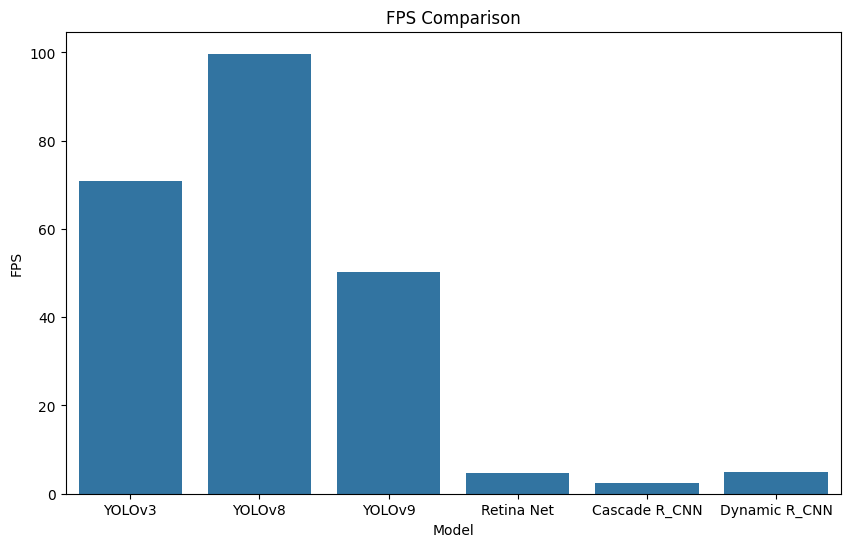

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='FPS', data=df)
plt.title('FPS Comparison')
plt.show()


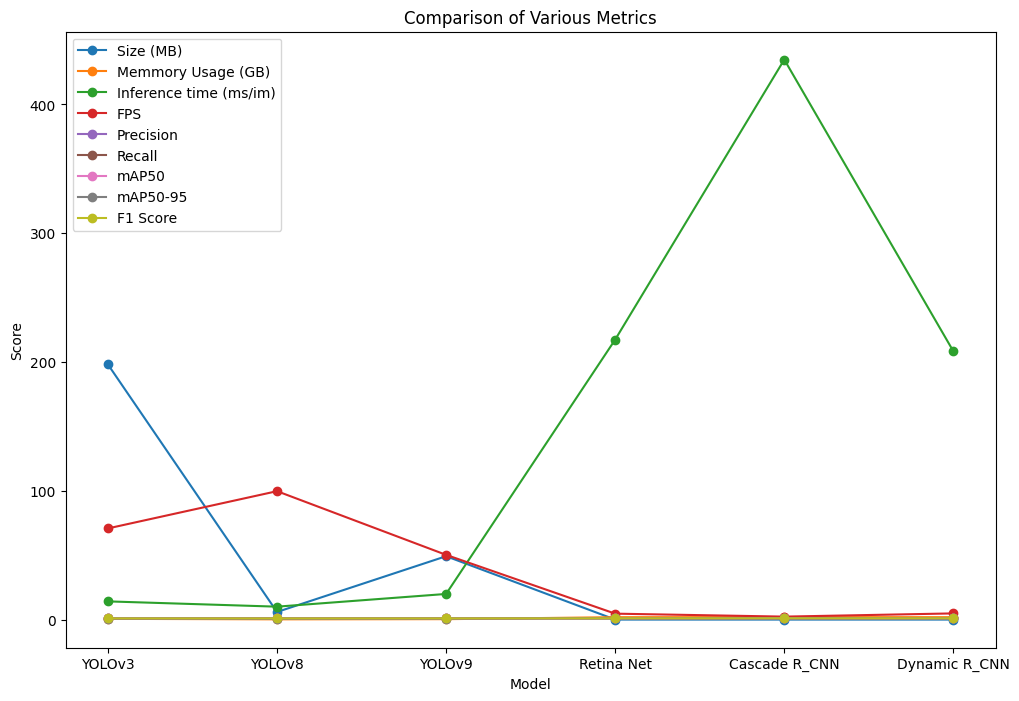

In [ ]:


df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Comparison of Various Metrics')
plt.ylabel('Score')
plt.show()


# Without k-fold data plots

In [ ]:
precision = 0.918
recall = 0.858

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.8869864864864865

<ipython-input-1-cf267ab023d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precision, palette='viridis', ax=axs[0, 0])
<ipython-input-1-cf267ab023d7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recall, palette='viridis', ax=axs[0, 1])
<ipython-input-1-cf267ab023d7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=map50, palette='viridis', ax=axs[1, 0])
<ipython-input-1-cf267ab023d7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

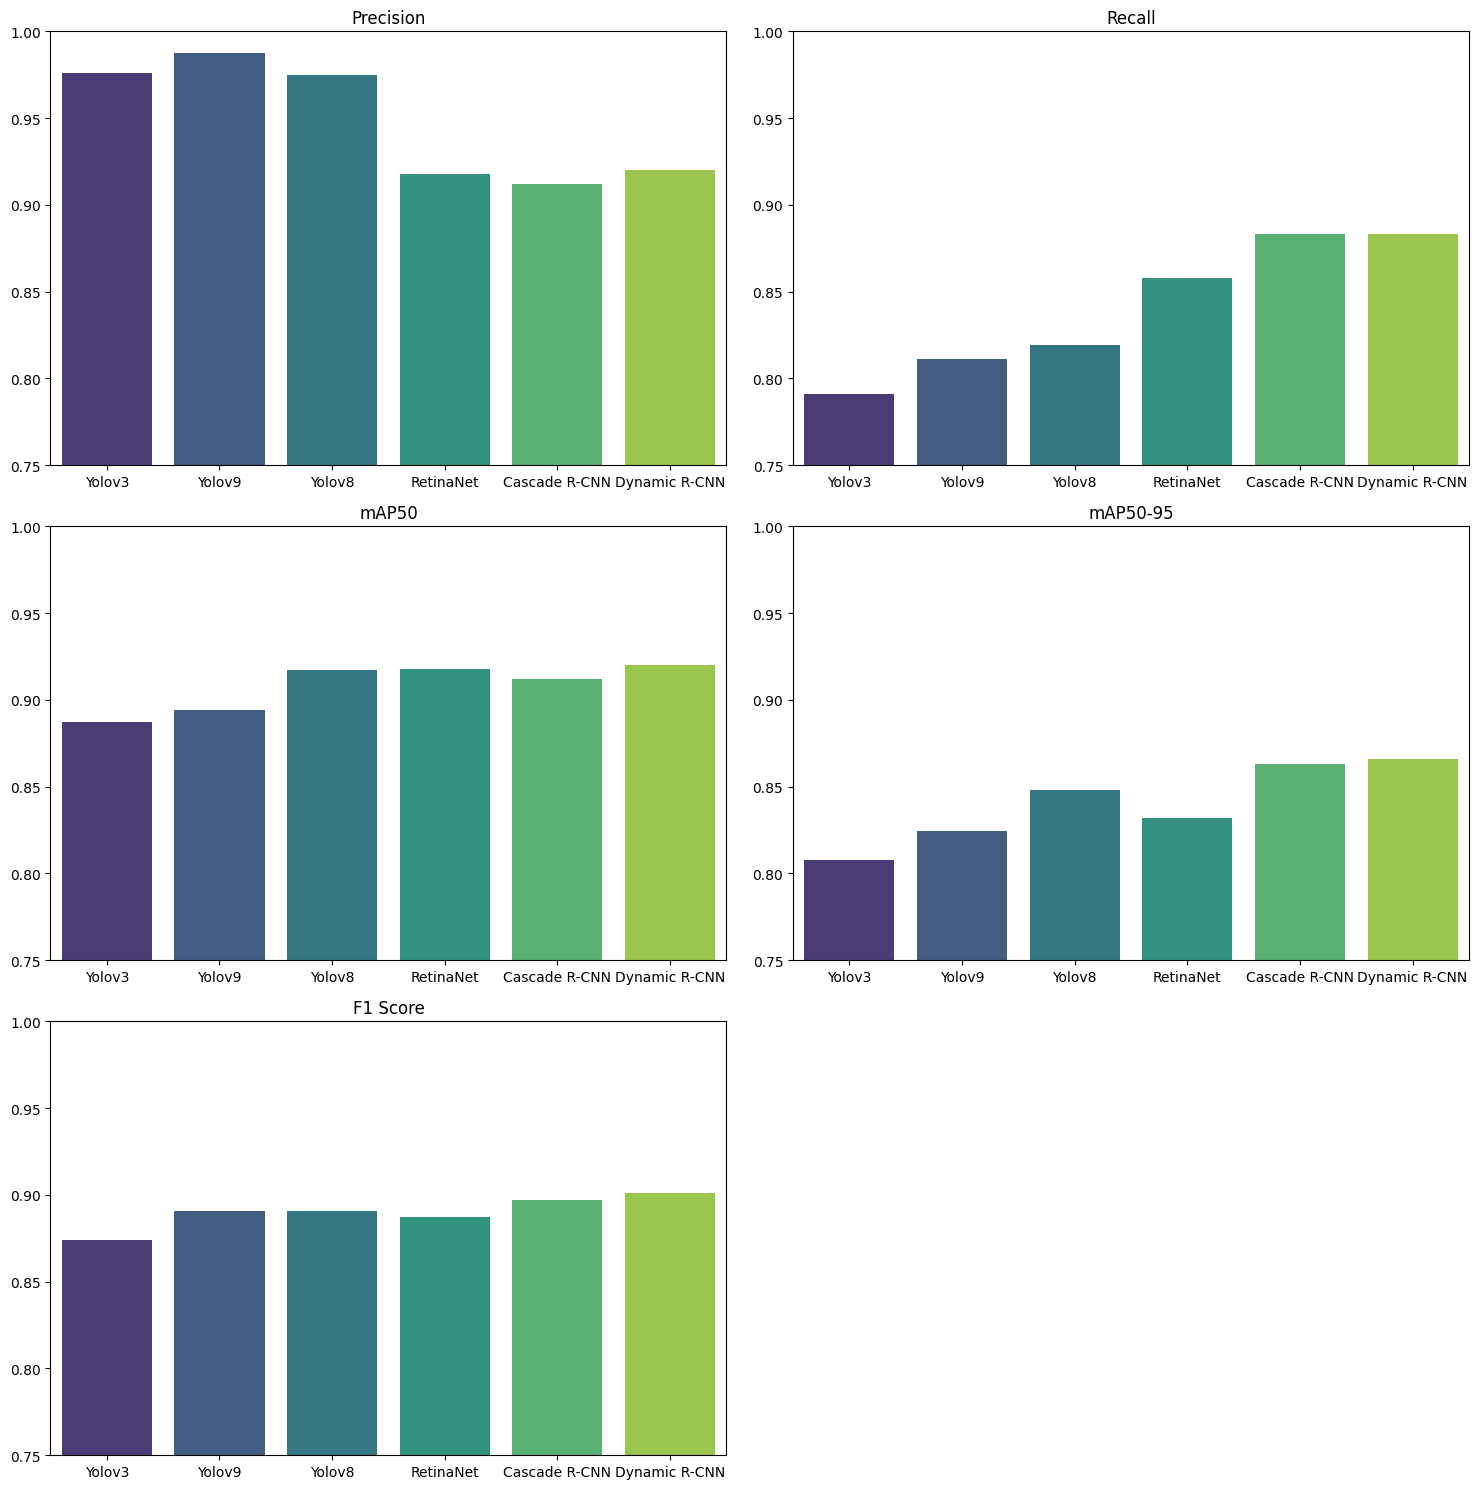

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Yolov3', 'Yolov9', 'Yolov8', 'RetinaNet', 'Cascade R-CNN','Dynamic R-CNN']
precision = [0.9761673707666685, 0.9876870162921217,0.9751243034105831,0.918, 0.912,0.920]
recall = [0.7909698996655519, 0.8110367892976589,0.8193954724865081, 0.858, 0.883,0.883]
map50 = [0.887004114996866, 0.8942104337378994,0.9169637060695887, 0.918, 0.912,0.920]
map50_95 = [0.8077889806273552, 0.8245971987196166,0.8481622575547834, 0.832, 0.863,0.866]
f1_score = [0.8738642099074131, 0.890687613112333,0.8905027964116592, 0.8869864864864865, 0.89726573816156,0.901120354963949]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Precision
sns.barplot(x=models, y=precision, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Precision')
axs[0, 0].set_ylim(0.75, 1.00)

# Recall
sns.barplot(x=models, y=recall, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Recall')
axs[0, 1].set_ylim(0.75, 1.00)

# mAP50
sns.barplot(x=models, y=map50, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('mAP50')
axs[1, 0].set_ylim(0.75, 1.00)

# mAP50-95
sns.barplot(x=models, y=map50_95, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('mAP50-95')
axs[1, 1].set_ylim(0.75, 1.00)

# F1 Score
sns.barplot(x=models, y=f1_score, palette='viridis', ax=axs[2, 0])
axs[2, 0].set_title('F1 Score')
axs[2, 0].set_ylim(0.75, 1.00)

# Remove the last empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-9-3f1821544871>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precision, palette='viridis', ax=axs[0, 0])
<ipython-input-9-3f1821544871>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recall, palette='viridis', ax=axs[0, 1])
<ipython-input-9-3f1821544871>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=map50, palette='viridis', ax=axs[1, 0])
<ipython-input-9-3f1821544871>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

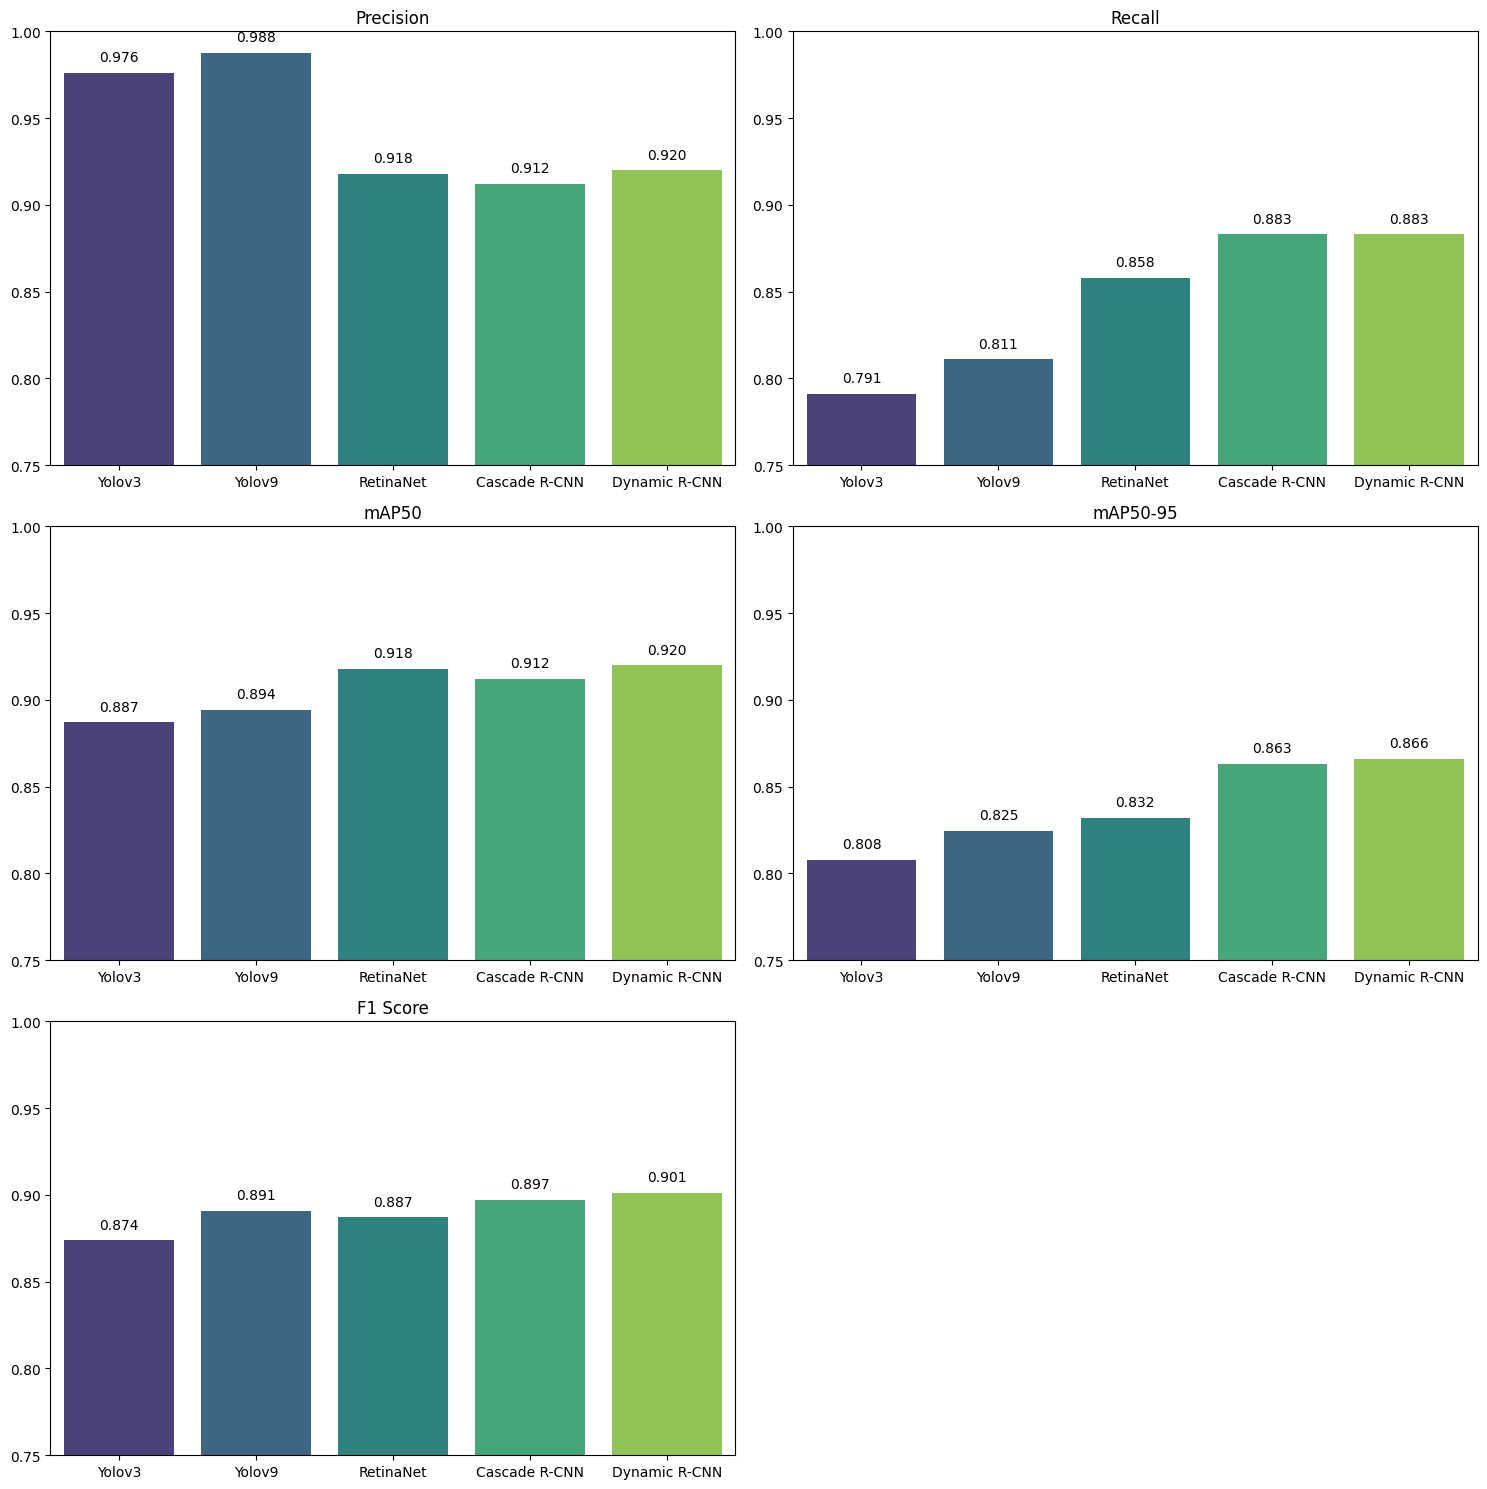

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Yolov3', 'Yolov9', 'RetinaNet', 'Cascade R-CNN','Dynamic R-CNN']
precision = [0.9761673707666685, 0.9876870162921217,0.918, 0.912,0.920]
recall = [0.7909698996655519, 0.8110367892976589, 0.858, 0.883,0.883]
map50 = [0.887004114996866, 0.8942104337378994, 0.918, 0.912,0.920]
map50_95 = [0.8077889806273552, 0.8245971987196166, 0.832, 0.863,0.866]
f1_score = [0.8738642099074131, 0.890687613112333, 0.8869864864864865, 0.89726573816156,0.901120354963949]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Function to add values on top of bars
def add_values(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.005, f"{v:.3f}", ha='center', va='bottom')

# Precision
sns.barplot(x=models, y=precision, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Precision')
axs[0, 0].set_ylim(0.75, 1.00)
add_values(axs[0, 0], precision)

# Recall
sns.barplot(x=models, y=recall, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Recall')
axs[0, 1].set_ylim(0.75, 1.00)
add_values(axs[0, 1], recall)

# mAP50
sns.barplot(x=models, y=map50, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('mAP50')
axs[1, 0].set_ylim(0.75, 1.00)
add_values(axs[1, 0], map50)

# mAP50-95
sns.barplot(x=models, y=map50_95, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('mAP50-95')
axs[1, 1].set_ylim(0.75, 1.00)
add_values(axs[1, 1], map50_95)

# F1 Score
sns.barplot(x=models, y=f1_score, palette='viridis', ax=axs[2, 0])
axs[2, 0].set_title('F1 Score')
axs[2, 0].set_ylim(0.75, 1.00)
add_values(axs[2, 0], f1_score)

# Remove the last empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()
